In [0]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss

In [6]:
# from google.colab import files
# uploaded = files.upload()

Saving mnist_train.csv to mnist_train.csv


In [7]:
# from google.colab import files
# uploaded = files.upload()

Saving mnist_test.csv to mnist_test.csv


In [0]:


image_size = 28 # width and length
no_of_different_labels = 10 # i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = ""
train_data = np.loadtxt(data_path + "mnist_train.csv", delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",")

In [9]:
test_data.shape

(10000, 785)

In [0]:
train_imgs = np.asfarray(train_data[:, 1:])/255.0
test_imgs = np.asfarray(test_data[:, 1:])/255.0
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [11]:
train_labels.shape

(60000, 1)

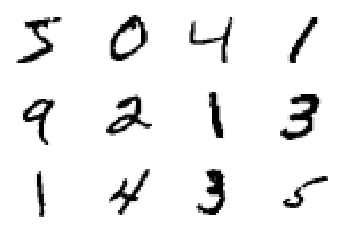

In [12]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
  axi.imshow(train_imgs[i].reshape((28,28)), cmap="Greys")
  axi.set(xticks=[], yticks=[])

2.1 Your turn! (20 points)
Write code to:
1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's MultinomialNB() with default
options and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.
(15 pts)

In [13]:

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train_imgs,train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
model.predict(test_imgs)

array([7., 2., 1., ..., 9., 8., 6.])

In [16]:
model.score(test_imgs, test_labels)

0.8357

In [25]:
accuracy = model.score(test_imgs, test_labels) * 100
print("Overall accuracy is", accuracy)

Overall accuracy is 95.83


In [18]:
# plotting the resulting confusing matrix.
y_predicted = model.predict(test_imgs)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_predicted)
cm

array([[ 912,    0,    2,    6,    1,    8,   14,    1,   36,    0],
       [   0, 1061,    5,    9,    0,    1,    6,    0,   52,    1],
       [  15,   11,  858,   24,   10,    3,   32,   12,   66,    1],
       [   4,   11,   34,  852,    1,   19,    7,   14,   41,   27],
       [   2,    2,    6,    0,  731,    0,   25,    1,   38,  177],
       [  23,   12,    6,  108,   18,  586,   17,    6,   79,   37],
       [  18,   13,   17,    1,    8,   24,  859,    0,   18,    0],
       [   1,   21,   11,    5,   18,    0,    1,  861,   41,   69],
       [   6,   26,   13,   55,   14,   27,    8,    9,  776,   40],
       [   6,    8,    3,   11,   65,    9,    1,   18,   27,  861]])

Text(66.5, 0.5, 'Truth')

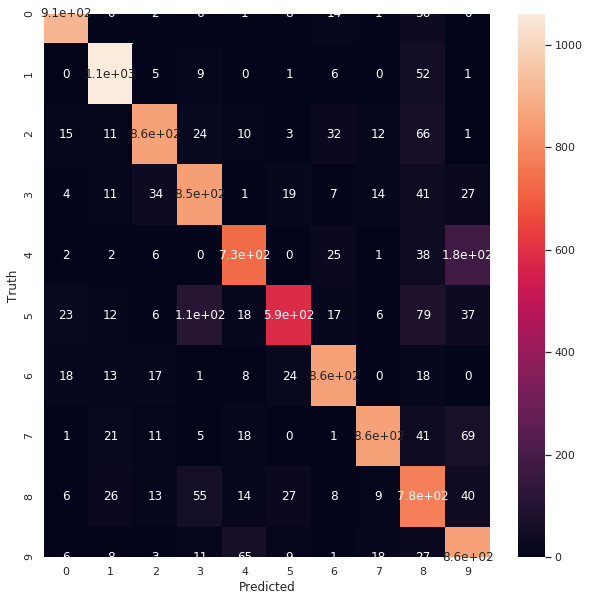

In [20]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# New Section
2.2 Your turn! (20 points)
Write code to:
1. Build and fit a 10-class Random Forests classifier using scikit-learn's RandomForestClassifier()
with default options (don't forget random_state=0 ) and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.
(15 pts)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(train_imgs, train_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [23]:
model.predict(test_imgs)

array([7., 2., 1., ..., 4., 5., 6.])

In [24]:
model.score(test_imgs, test_labels)

0.9583

In [26]:
accuracy = model.score(test_imgs, test_labels) * 100
print("Overall accuracy is", accuracy)

Overall accuracy is 95.83


In [27]:
# plotting the resulting confusing matrix.
y_predicted = model.predict(test_imgs)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_predicted)
cm

array([[ 967,    1,    4,    0,    0,    2,    3,    1,    1,    1],
       [   0, 1117,    4,    4,    0,    3,    3,    0,    4,    0],
       [   6,    1,  990,    6,    3,    1,    3,   11,   10,    1],
       [   1,    1,   13,  959,    0,   17,    0,    8,    9,    2],
       [   2,    2,    2,    0,  945,    0,    8,    1,    7,   15],
       [   5,    2,    1,   16,    3,  845,    6,    2,    6,    6],
       [  10,    3,    2,    1,    4,    5,  929,    0,    4,    0],
       [   1,    4,   25,    3,    4,    0,    0,  982,    2,    7],
       [   6,    0,    7,   18,    7,    9,    7,    7,  903,   10],
       [   7,    6,    3,   12,   21,    5,    0,    3,    6,  946]])

Text(66.5, 0.5, 'Truth')

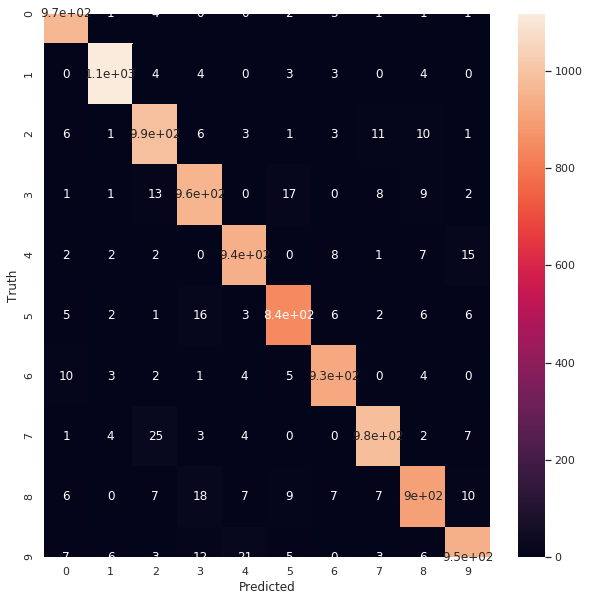

In [28]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# New Section
2.3 Your turn! (20 points)
Write code to:
1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw
pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.
(15 pts)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_imgs, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
model.predict(test_imgs)


array([7., 2., 1., ..., 4., 5., 6.])

In [31]:
model.score(test_imgs, test_labels)


0.9201

In [32]:
accuracy = model.score(test_imgs, test_labels) * 100
print("Overall accuracy is", accuracy)

Overall accuracy is 92.01


In [33]:
# plotting the resulting confusing matrix.
y_predicted = model.predict(test_imgs)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_predicted)
cm

array([[ 960,    0,    1,    2,    0,    5,    6,    3,    1,    2],
       [   0, 1112,    3,    1,    0,    1,    5,    1,   12,    0],
       [   8,    8,  920,   20,    9,    5,   10,   11,   37,    4],
       [   4,    0,   17,  919,    2,   22,    4,   12,   21,    9],
       [   1,    2,    5,    3,  914,    0,   10,    2,    7,   38],
       [  10,    2,    0,   42,   10,  769,   17,    7,   28,    7],
       [   9,    3,    7,    2,    6,   20,  907,    1,    3,    0],
       [   2,    7,   22,    5,    8,    1,    1,  950,    5,   27],
       [  10,   14,    5,   21,   14,   27,    7,   11,  853,   12],
       [   8,    8,    2,   13,   31,   14,    0,   24,   12,  897]])

Text(66.5, 0.5, 'Truth')

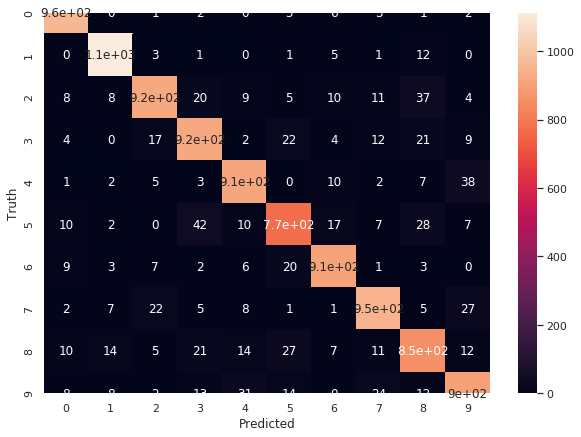

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')